In [ ]:
pip install hvplot

In [ ]:
# Imports
import hvplot.pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


---

## Exploratory Data Analysis

In [ ]:
# Import the `files` library to allow files upload
from google.colab import files

uploaded = files.upload()

Saving creditcard_2023.csv to creditcard_2023.csv


In [ ]:
# Import applicants_data.csv to Google Colab
# Read the CSV file from the terminal
df = pd.read_csv("creditcard_2023.csv")

# Review the DataFrame
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
# Review the data types associated with the columns
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
#viewing statistics about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486122,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [ ]:
#looking for null values
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

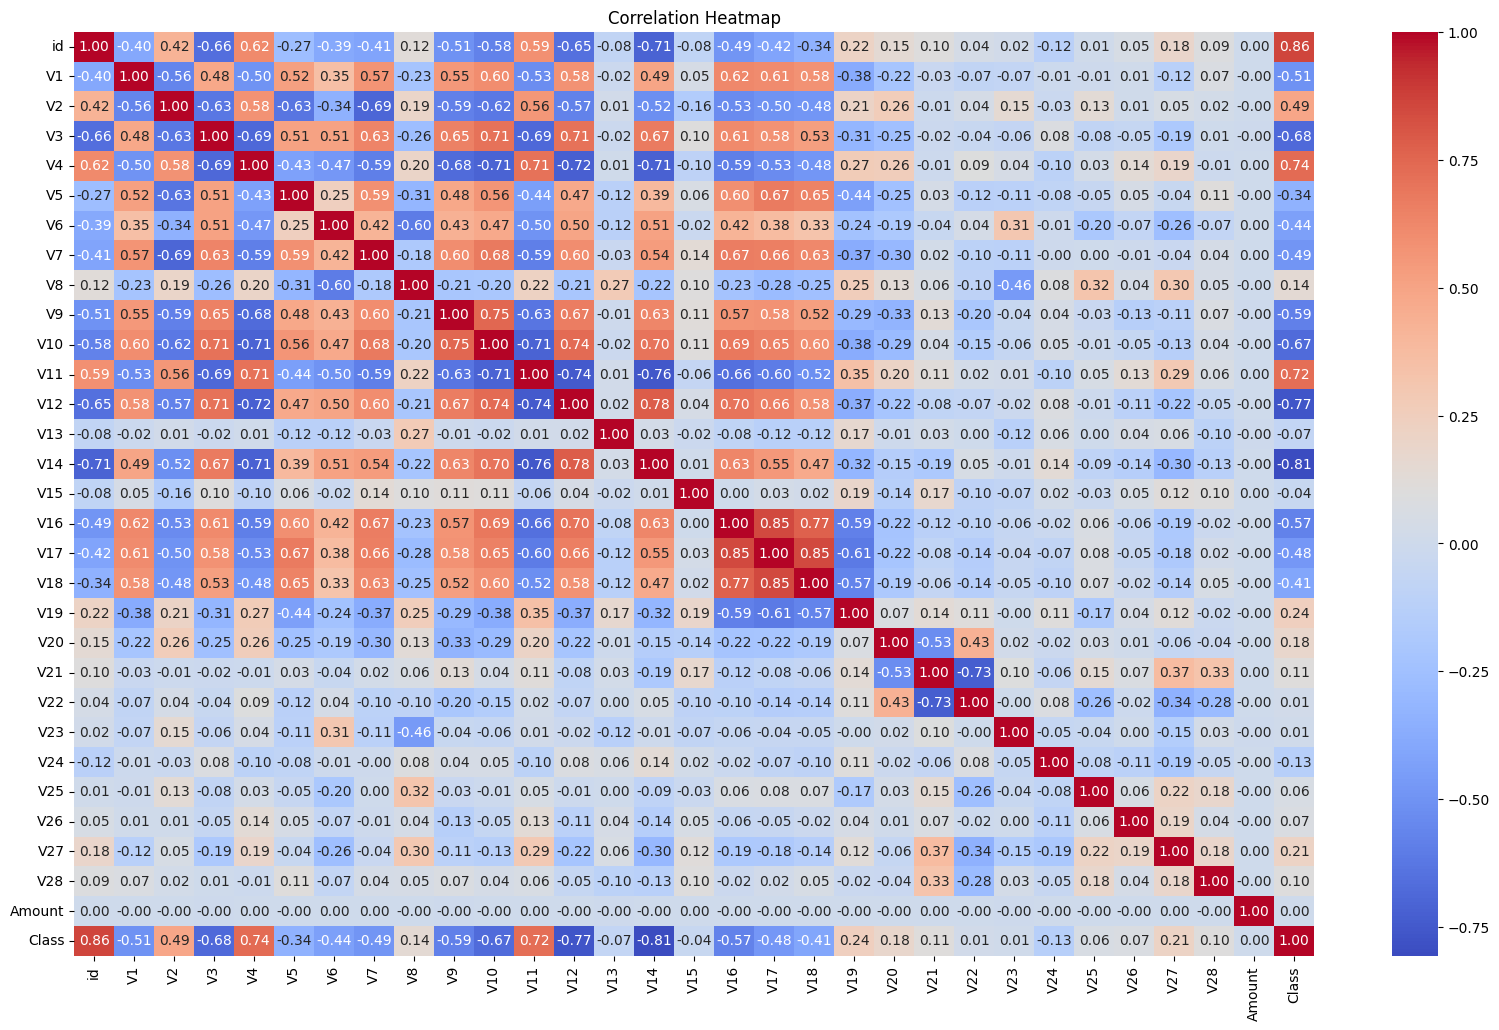

In [ ]:
#analyzing related columns
df_corr = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

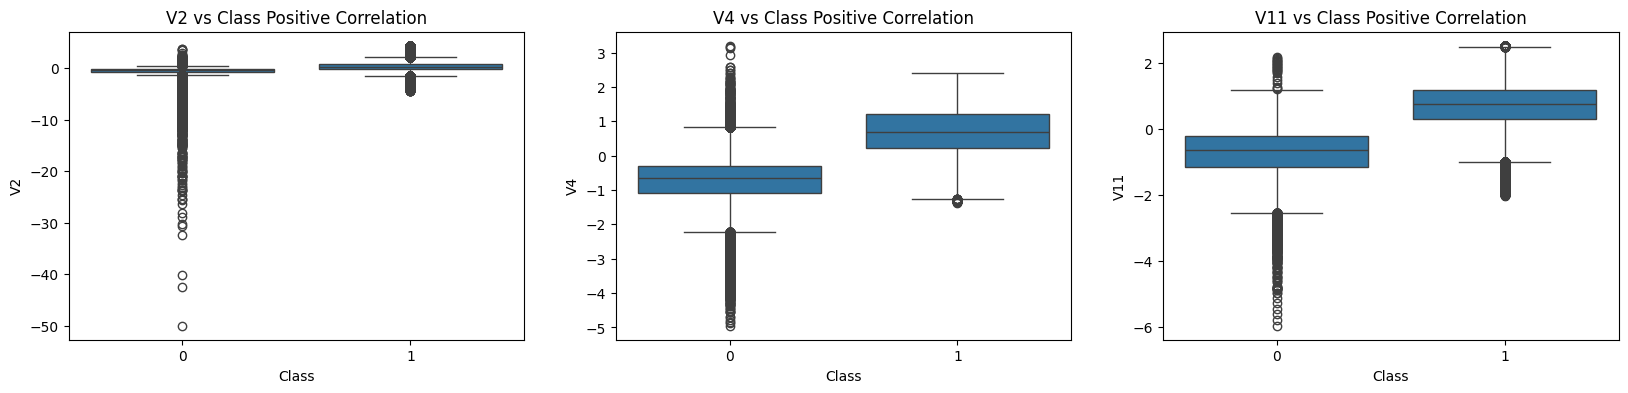

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

plt.show()



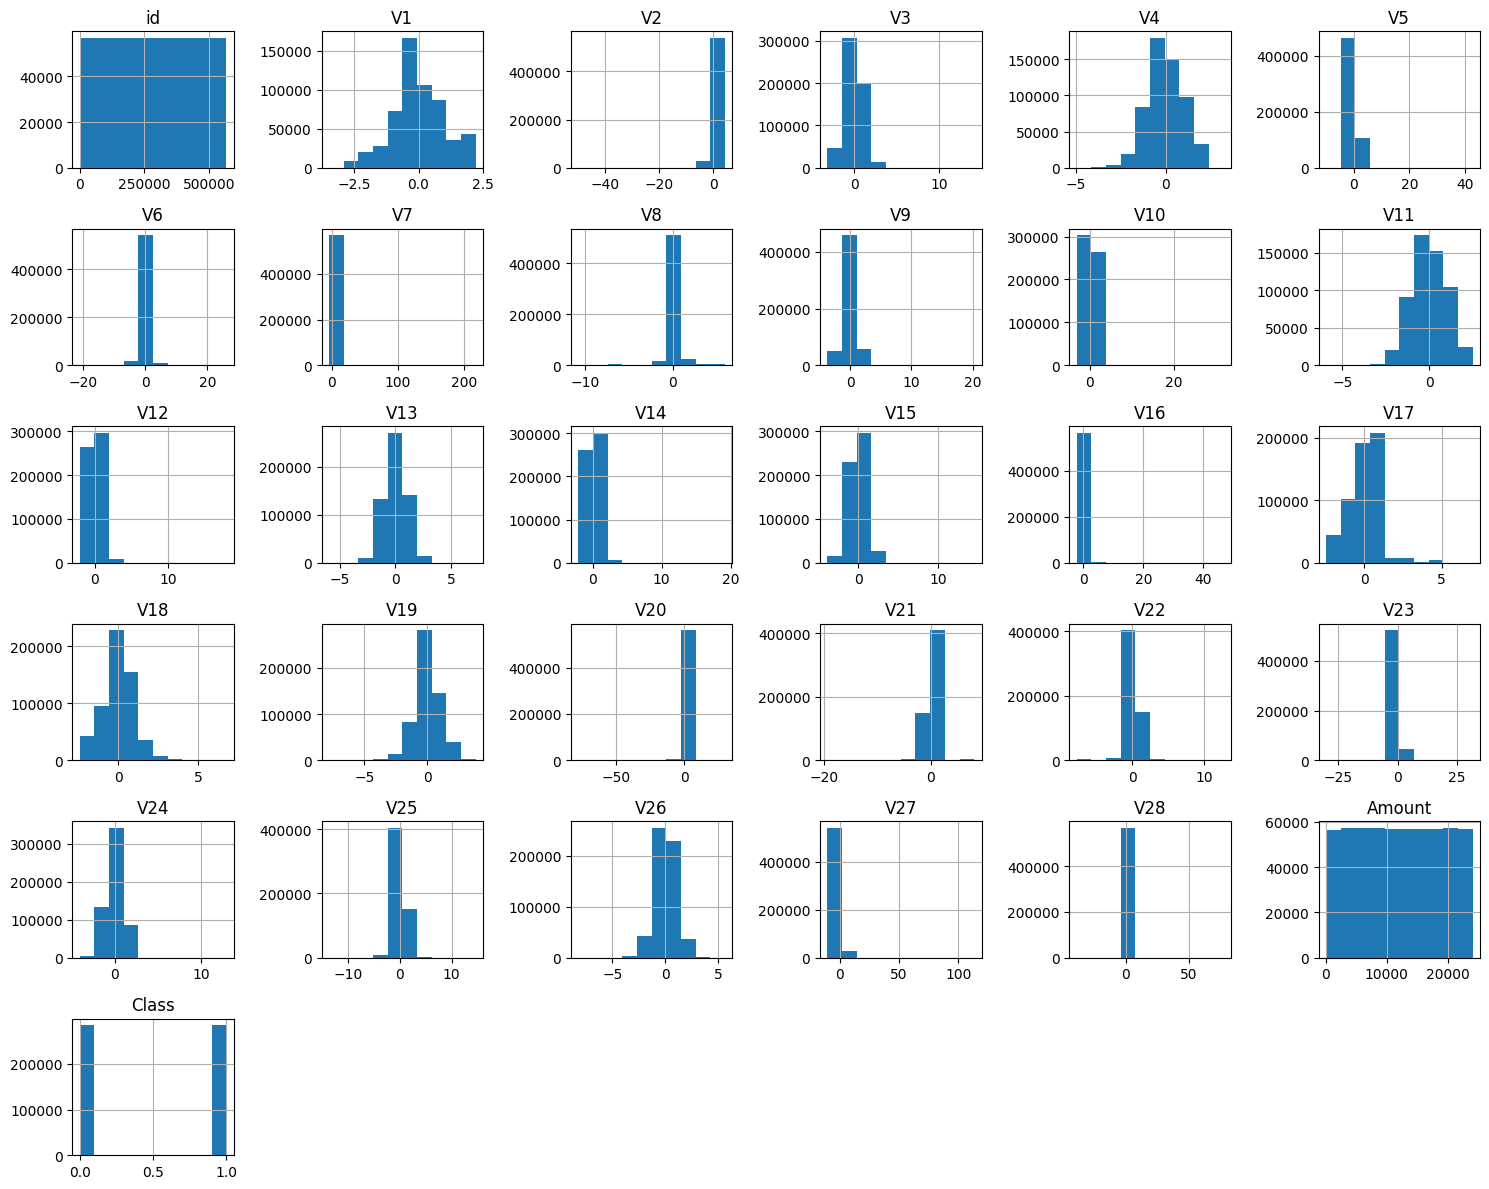

In [ ]:
#plot histogram of dataframe
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


In [ ]:
class_counts = df['Class'].value_counts()

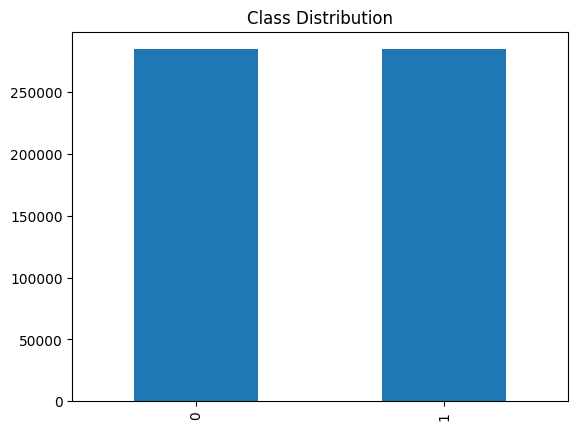

In [ ]:
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.show()


### Step 2: Data Preparation



In [ ]:
# Define the target set y using the Class column
y = df["Class"]

# Display a sample of y
y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

In [ ]:
# Define features set X by selecting all columns but Class
X = df.drop(columns=['Class'], axis=1)

# Review the features DataFrame
X.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


### Step 3: Split the features and target sets into training and testing datasets.


In [ ]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Step 5: Compile and Evaluate a Binary Classification Model Using a Neural Network

### Creating a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.


In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = 30

# Review the number of features
number_input_features

30

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 10

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

10

In [ ]:
#updating the tensorflow library graph
graph = tf.compat.v1.get_default_graph()

In [ ]:
# Create the Sequential model instance
nn = Sequential()

In [ ]:
# Adding the hidden layer with an activation function "relu"
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [ ]:
# Adding the output layer to the model specifying the number of output neurons and activation function for binary classification
nn.add(Dense(units=number_output_neurons, activation='sigmoid'))

In [ ]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###  Compile and fitting the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [ ]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting the model using 10 epochs and the training data
deep_learning_model = nn.fit(X_train_scaled, y_train, epochs=10, verbose=1)

Epoch 1/10
13328/13328 [==============================] - 34s 3ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 2/10
13328/13328 [==============================] - 29s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 3/10
13328/13328 [==============================] - 32s 2ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 4/10
13328/13328 [==============================] - 38s 3ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 5/10
13328/13328 [==============================] - 31s 2ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 6/10
13328/13328 [==============================] - 31s 2ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 7/10
13328/13328 [==============================] - 34s 3ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 8/10
13328/13328 [==============================] - 31s 2ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 9/10
13328/13328 [==============================] - 32s 2ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 10/10
13328/13328 [==============================

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=1)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4443/4443 [==============================] - 8s 2ms/step - loss: 0.0017 - accuracy: 0.9996
Loss: 0.0017001214437186718, Accuracy: 0.9996412396430969


---

## Optimize the neural network model


###  Defining two more deep neural network models (resulting in the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

### Alternative Model 1

In [ ]:
#setting callbacks function
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss`
        # is no longer improving
        monitor="loss",
        # "no longer improving" being defined
        # as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further
        # defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

30

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 10

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

10

In [ ]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = 10

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A1

10

In [ ]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [ ]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))

#Second Hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, input_dim=number_input_features, activation="relu"))

# Output layer
nn_A1.add(Dense(units=number_output_neurons, activation='sigmoid'))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431 (1.68 KB)
Trainable params: 431 (1.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model using 10 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2, callbacks = callbacks)

Epoch 1/10
5331/5331 [==============================] - 16s 3ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.0054 - val_accuracy: 0.9988
Epoch 2/10
5331/5331 [==============================] - 16s 3ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 3/10
5331/5331 [==============================] - 17s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 4/10
5331/5331 [==============================] - 17s 3ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 4: early stopping


In [ ]:
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.00213067140430212, Accuracy: 0.999556839466095


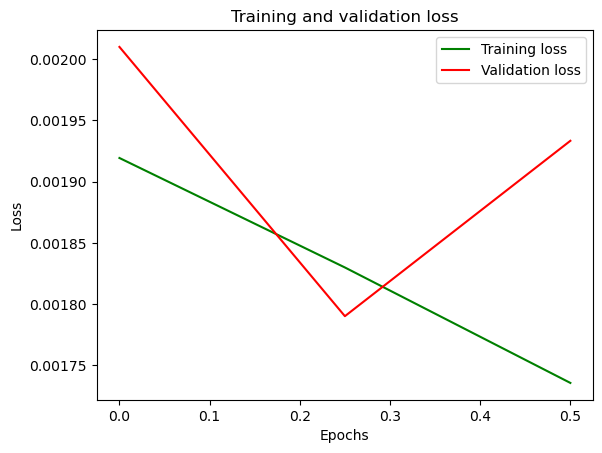

In [ ]:
#setting up variables and x and y axis for loss visual
history = fit_model_A1.history

# Extracting both training and validation loss values
training_loss = history['loss']
validation_loss = history['val_loss']

# the range of epochs
epochs = np.arange(0, len(training_loss) * 0.25, 0.25)

# Plotting the training and validation loss
plt.plot(epochs[:len(training_loss)], training_loss, 'g', label='Training loss')
plt.plot(epochs[:len(validation_loss)], validation_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()
plt.show()



In [ ]:
#calculating predictive analysis
y_pred = nn.predict(X_test_scaled)
y_pred = np.where(y_pred > 0.5, 1, 0)

4443/4443 [==============================] - 9s 2ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[71117,    26],
       [   31, 70984]], dtype=int64)

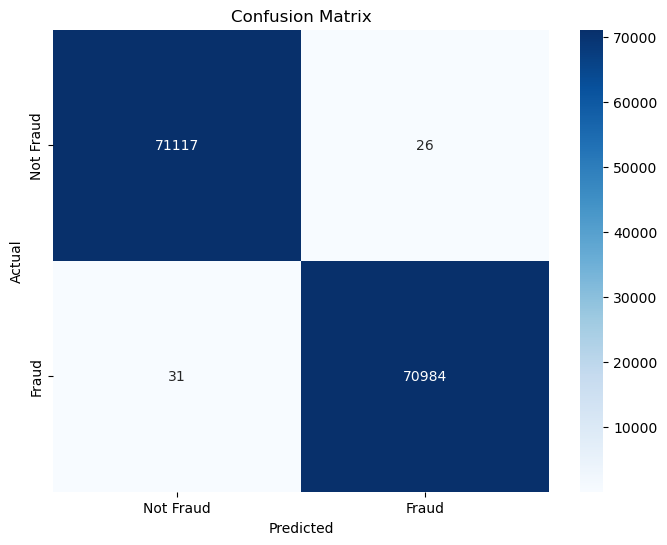

In [ ]:
#using confusion matrix to visualize True Negatives and True Positives
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71143
           1       1.00      1.00      1.00     71015

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



#### Alternative Model 2

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features2 = len(X_train.iloc[0])

# Review the number of features
number_input_features2

30

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 10

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

10

In [ ]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = 10

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A2

10

In [ ]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [ ]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features2, activation="tanh"))

#Second Hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation="tanh"))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation='sigmoid'))


In [ ]:
nn_A2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                310       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 431 (1.68 KB)
Trainable params: 431 (1.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.2, callbacks = callbacks)

Epoch 1/10
2666/2666 [==============================] - 17s 6ms/step - loss: 0.0487 - accuracy: 0.9829 - val_loss: 0.0064 - val_accuracy: 0.9983
Epoch 2/10
2666/2666 [==============================] - 13s 5ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9990
Epoch 3/10
2666/2666 [==============================] - 14s 5ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 4/10
2666/2666 [==============================] - 13s 5ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 4: early stopping


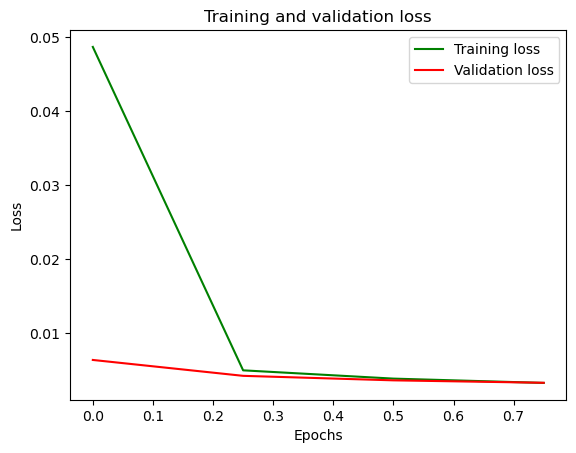

In [ ]:
#setting up variables and x and y axis for loss visual
history_A2 = fit_model_A2.history

# Extracting both training and validation loss values for 3rd model
training_loss_A2 = history_A2['loss']
validation_loss_A2 = history_A2['val_loss']

# the range of epochs
epochs_A2 = np.arange(0, len(training_loss_A2) * 0.25, 0.25)

# Plotting the training and validation loss
plt.plot(epochs_A2[:len(training_loss_A2)], training_loss_A2, 'g', label='Training loss')
plt.plot(epochs_A2[:len(validation_loss_A2)], validation_loss_A2, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()
plt.show()

### Displaying the accuracy scores achieved by each model, and comparing the results.

In [ ]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
Loss: 0.0017559927655383945, Accuracy: 0.999599039554596


In [ ]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=0)


# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
Loss: 0.0021923582535237074, Accuracy: 0.99948650598526


In [ ]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=0)


# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
Loss: 0.0032524217385798693, Accuracy: 0.9991980791091919
